        Fp1       Fp2        F3        F4        F7        F8        T3  \
0  0.568216  0.611132  0.575227  0.563301  0.547578  0.584348  0.516688   
1  0.549234  0.606767  0.558503  0.557289  0.535584  0.591352  0.511835   
2  0.527428  0.603700  0.541106  0.552726  0.522338  0.603697  0.506143   
3  0.506279  0.603914  0.526977  0.551766  0.510227  0.621657  0.500696   
4  0.489295  0.609117  0.519866  0.556114  0.501650  0.644348  0.496820   

         T4        C3        C4        T5        T6        P3        P4  \
0  0.492882  0.596363  0.583850  0.532387  0.451058  0.485480  0.521781   
1  0.490745  0.585270  0.571765  0.531899  0.455864  0.480750  0.518333   
2  0.488685  0.573794  0.558366  0.532250  0.462761  0.475455  0.514807   
3  0.487251  0.564776  0.546402  0.533928  0.471352  0.470618  0.511909   
4  0.486915  0.561038  0.538696  0.537132  0.480844  0.467261  0.510123   

         O1        O2        Fz        Cz        Pz  
0  0.384817  0.429726  0.552929  0.612747  0

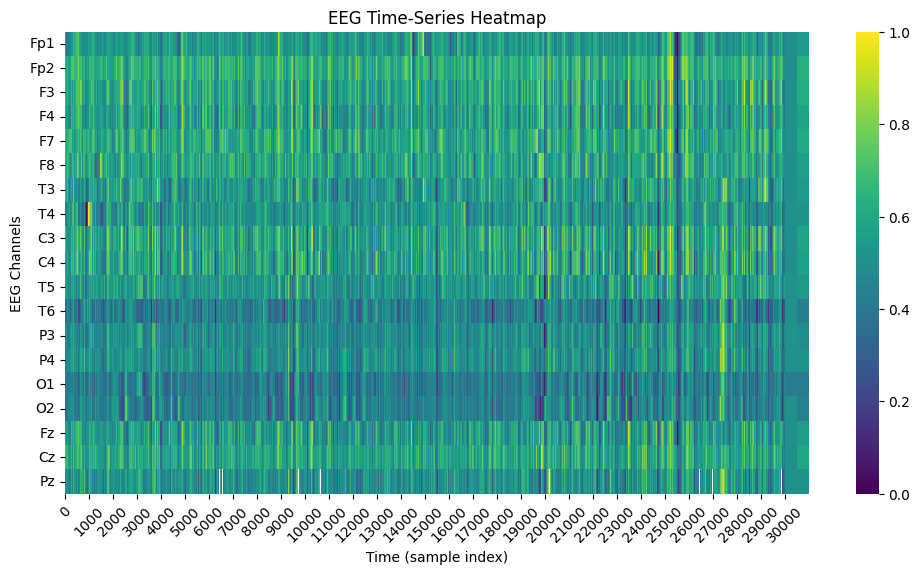

In [11]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define channel names
channel_names = [
    "Fp1", "Fp2", "F3", "F4", "F7", "F8", "T3", "T4", "C3", "C4", 
    "T5", "T6", "P3", "P4", "O1", "O2", "Fz", "Cz", "Pz"
]

# Load the data with a reliable delimiter
file_path = '../Dataset/s00.csv'

# Use regular expressions to ensure correct floating-point parsing
float_pattern = re.compile(r'-?\d+\.\d+')

# Read each line, extract floating-point numbers, and build a DataFrame
data_list = []
with open(file_path, 'r') as file:
    for line in file:
        floats = float_pattern.findall(line)
        data_list.append([float(value) for value in floats])

# Convert the data into a DataFrame
data = pd.DataFrame(data_list, columns=channel_names)

# Ensure data is numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Normalize the data (you can skip this if normalization is not required for the visualization)
data_normalized = (data - data.min()) / (data.max() - data.min())

# Display first few rows to verify data
print(data_normalized.head())

# Example Visualization: Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data_normalized.T, cmap="viridis", cbar=True, xticklabels=100, yticklabels=channel_names)

# Set the title and axis labels
plt.title("EEG Time-Series Heatmap")
plt.xlabel("Time (sample index)")
plt.ylabel("EEG Channels")

# Adjust x-axis labels to reduce clutter
plt.xticks(ticks=plt.xticks()[0][::10], rotation=45)  # Show every 10th tick with a 45-degree angle

# Show the plot
plt.show()


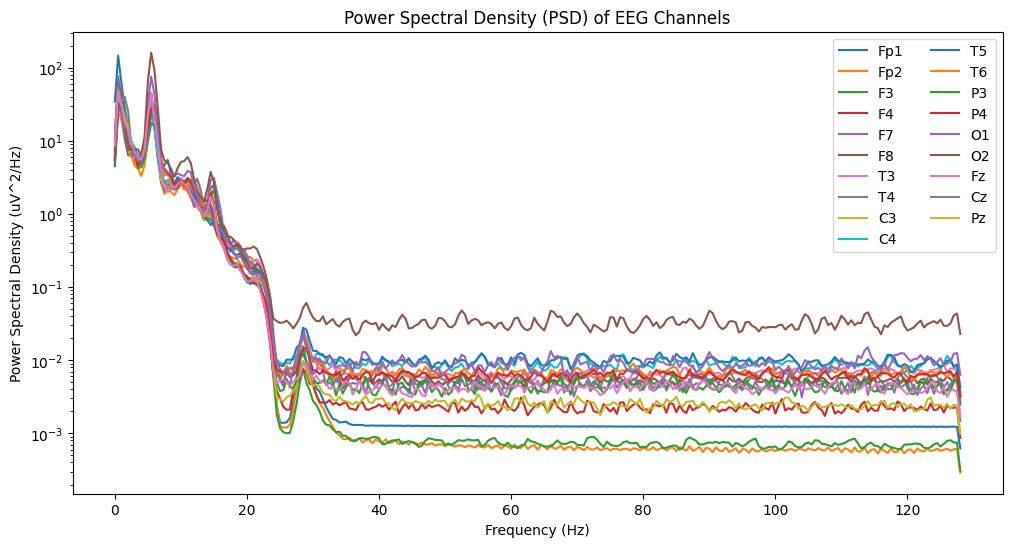

In [12]:
plt.figure(figsize=(12, 6))
for channel in channel_names:
    freqs, psd = welch(data[channel], fs=256, nperseg=512)  # Assuming a sampling rate of 256 Hz
    plt.semilogy(freqs, psd, label=channel)
    
plt.title("Power Spectral Density (PSD) of EEG Channels")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (uV^2/Hz)")
plt.legend(loc="upper right", ncol=2)
plt.show()


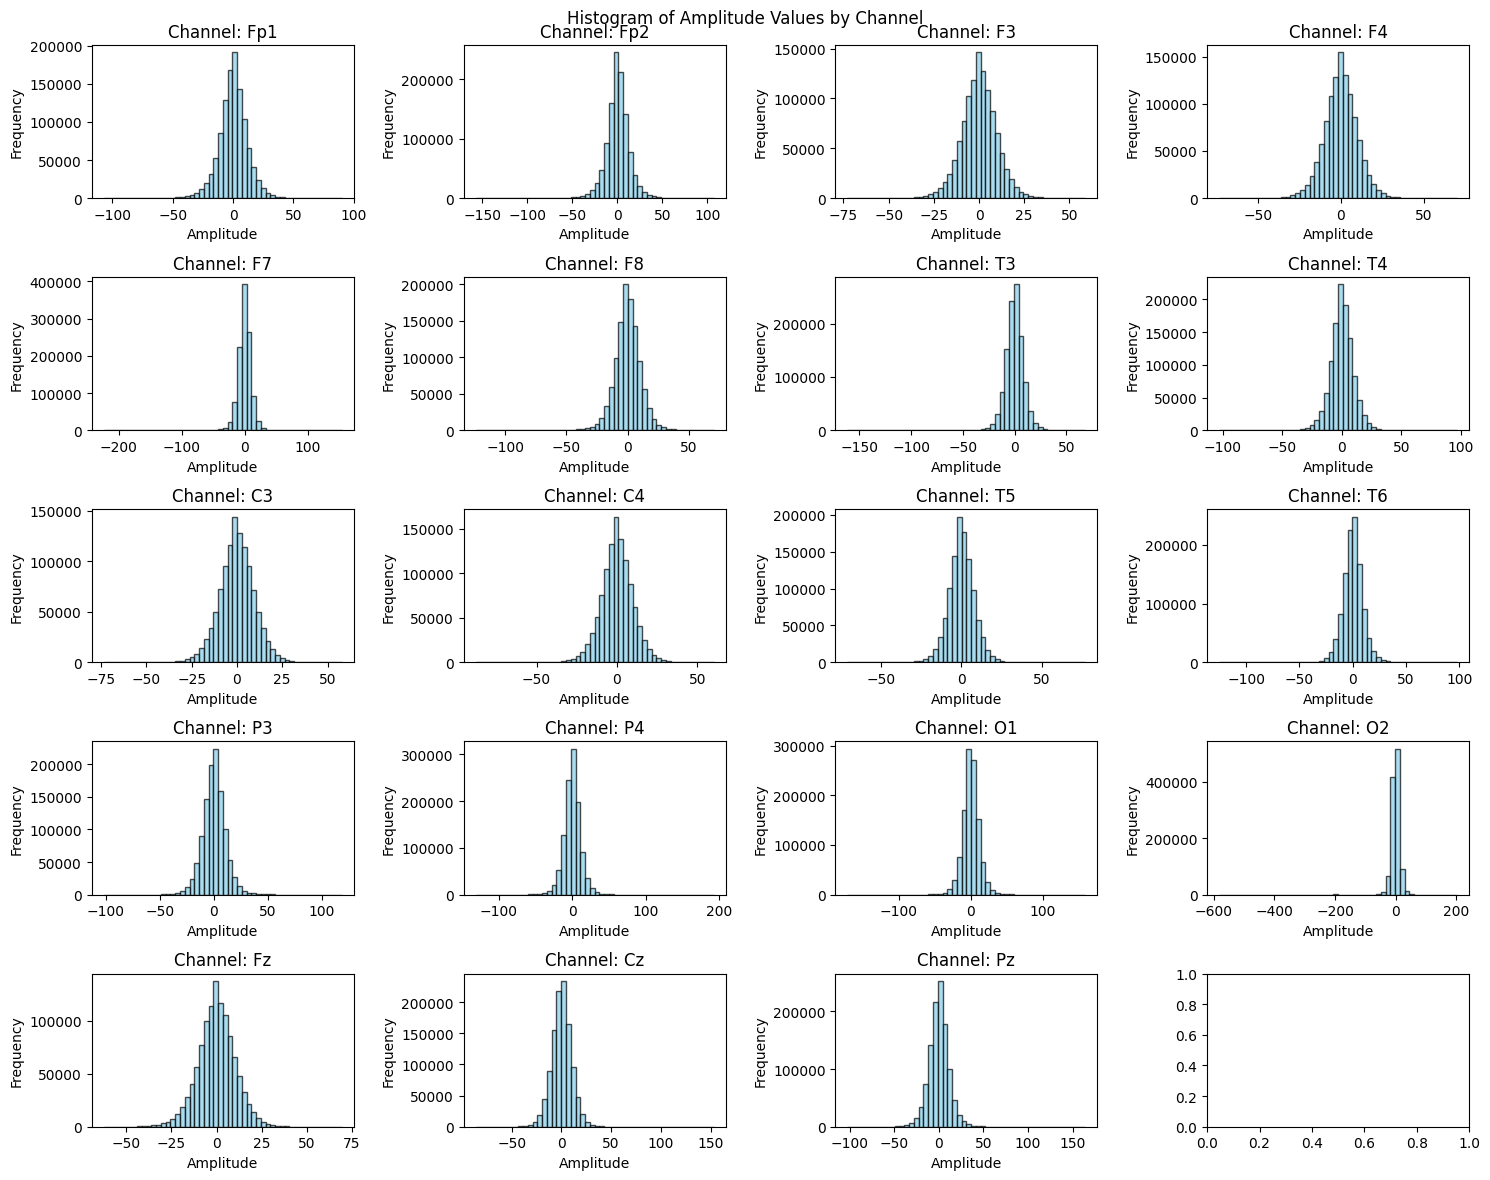

In [31]:
# Combine amplitude values for each channel across all subjects into a single DataFrame
all_data_df = pd.DataFrame(all_data_list, columns=channel_names)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot histogram for each channel
for i, channel in enumerate(channel_names):
    axes[i].hist(all_data_df[channel], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Channel: {channel}')
    axes[i].set_xlabel('Amplitude')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.suptitle('Histogram of Amplitude Values by Channel')
plt.subplots_adjust(top=0.95)  # Adjust to make room for the main title

plt.show()

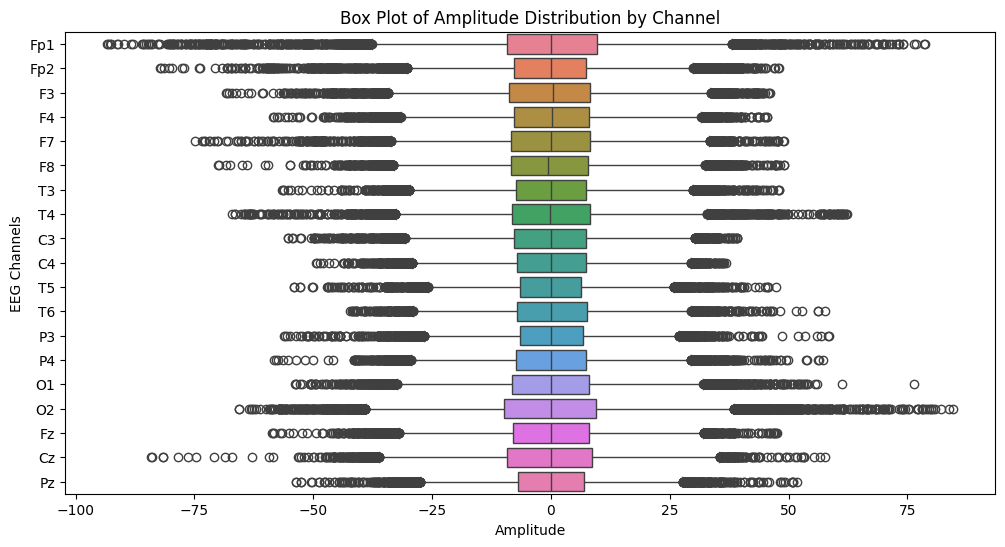

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h")
plt.title("Box Plot of Amplitude Distribution by Channel")
plt.xlabel("Amplitude")
plt.ylabel("EEG Channels")
plt.show()


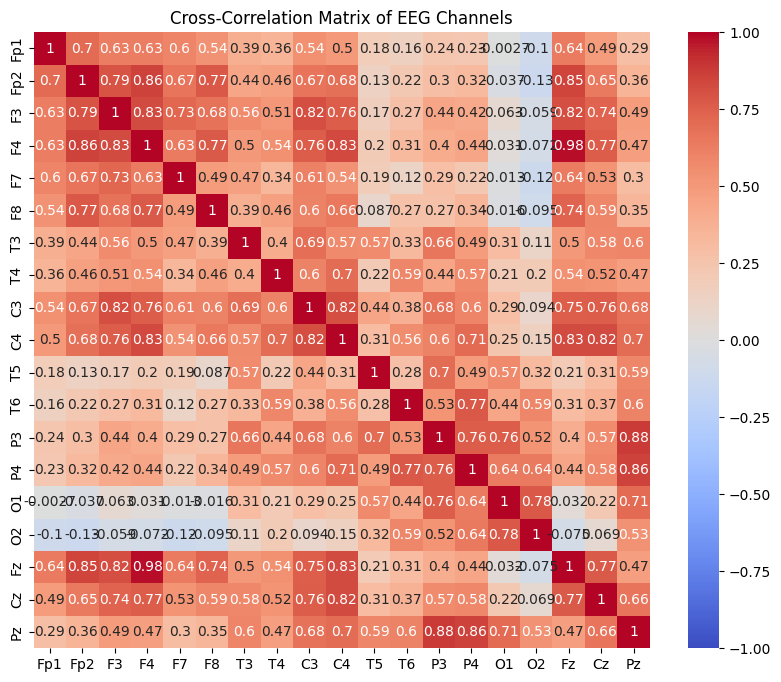

In [17]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True,
            xticklabels=channel_names, yticklabels=channel_names)
plt.title("Cross-Correlation Matrix of EEG Channels")
plt.show()


In [7]:
import pandas as pd
import os
from glob import glob
import re

# Define channel names as per the data description
channel_names = [
    "Fp1", "Fp2", "F3", "F4", "F7", "F8", "T3", "T4", "C3", "C4", 
    "T5", "T6", "P3", "P4", "O1", "O2", "Fz", "Cz", "Pz"
]

# Path to your dataset folder
data_folder_path = '../Dataset/'  # Replace with the correct path
data_files = glob(os.path.join(data_folder_path, '*.csv'))

# Regular expression to find floating-point numbers
float_pattern = re.compile(r'-?\d+\.\d+')

# Initialize an empty list to collect all data
all_data_list = []

# Process each CSV file
for file in data_files:
    # Read each line as raw text to extract floating-point values with regular expression
    with open(file, 'r') as f:
        for line in f:
            floats = float_pattern.findall(line)  # Extract float values
            if floats:
                # Convert to integers by first converting to floats, then to int
                int_values = [int(float(value)) for value in floats]
                all_data_list.append(int_values)

# Convert the accumulated data into a DataFrame
all_data_df = pd.DataFrame(all_data_list, columns=channel_names)

# Save the resulting DataFrame to a single CSV file
output_file_path = '../Dataset/all_data_combined.csv'  # Specify your output path here
all_data_df.to_csv(output_file_path, index=False)

print(f"Combined data saved to {output_file_path}")


Combined data saved to ../Dataset/all_data_combined.csv


In [13]:
import numpy as np

# Define the path to the binary file
file_path = '../Dataset/CutData3.bin'

# Load binary data (assuming it’s in 32-bit float format)
# Adjust dtype and shape based on your file's actual data structure.
data = np.fromfile(file_path, dtype=np.float32)

# If the data should be in a 2D grid, reshape it accordingly.
# Replace (100, 100) with the actual dimensions if you know them.
# For example, data = data.reshape((100, 100)) if it represents a 100x100 matrix.
# Print the first few values to understand the data
print("First few values:", data[:10])

# Print data length to get an idea of possible dimensions
print("Data length:", len(data))




First few values: [           nan            nan -3.3363479e+38            nan
            nan            nan  6.4284973e-39  5.5102391e-39
  6.7040725e-39  9.7346985e-39]
Data length: 250000


C:\Users\Soroush\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1398: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)


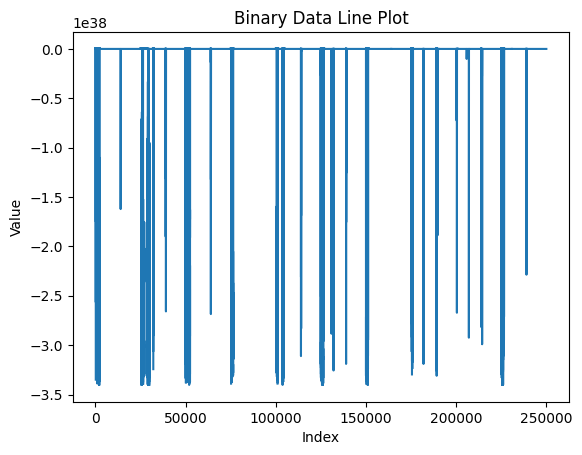

In [14]:
import matplotlib.pyplot as plt

plt.plot(data)
plt.title("Binary Data Line Plot")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


C:\Users\Soroush\AppData\Roaming\Python\Python311\site-packages\matplotlib\image.py:492: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


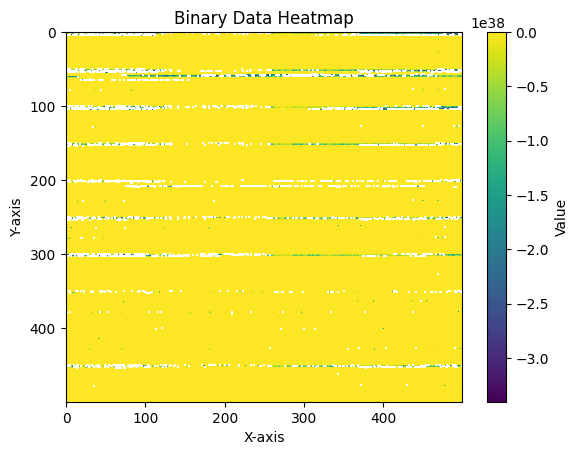

In [16]:
data_2d = data.reshape((500, 500))

plt.imshow(data_2d, cmap='viridis', aspect='auto')
plt.colorbar(label="Value")
plt.title("Binary Data Heatmap")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


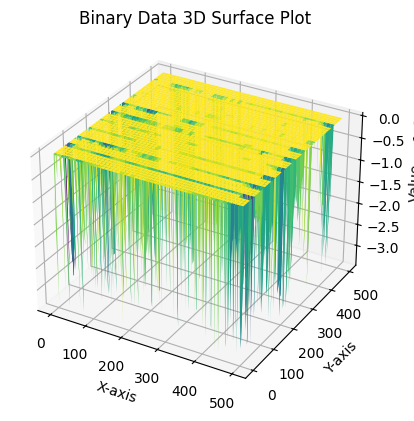

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming data_2d is a 2D array as in the previous example
x = np.arange(data_2d.shape[1])
y = np.arange(data_2d.shape[0])
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, data_2d, cmap='viridis')
ax.set_title("Binary Data 3D Surface Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Value")
plt.show()
